## Week 3 Imputation and EDS

### Install the Advanced Analytics library

In [76]:
!pip install AdvancedAnalytics

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


## Import packages for analysis

In [94]:
# Pandas library for data manipulation and analysis, especially for DataFrames
import pandas as pd       

# NumPy library for numerical computations and handling arrays
import numpy as np        

# Statsmodels library for estimating and testing statistical models
import statsmodels.api as sm    

# Statsmodels evaluation measures for model performance (e.g., MSE, MAE)
import statsmodels.tools.eval_measures as em    

# SciPy's normal distribution functions for working with statistical distributions
from scipy.stats import norm    

# Matplotlib for creating static, animated, or interactive plots and graphs
import matplotlib.pyplot as plt     

# Scikit-learn function to split datasets into training and testing sets
from sklearn.model_selection import train_test_split   

# AdvancedAnalytics library for data preprocessing (Replace, Impute, Encode) and decision tree imputation
from AdvancedAnalytics.ReplaceImputeEncode import ReplaceImputeEncode, DT  

# AdvancedAnalytics regression functions for linear regression and stepwise regression
from AdvancedAnalytics.Regression import linreg, stepwise  

import seaborn as sns

# Display the updated DataFrame to verify the changes
from IPython.display import display


## Make a data map for imputing

In [98]:
""" **********************************************************************  """
# Start of data map definition
"""  DATA MAP                                                               """

# Attribute map for the dataset. This dictionary maps each attribute (column) to its data type (DT) and acceptable range or categories
attribute_map = {

    # 'obs' is the ID field, where the value should be a positive integer or infinite (1, ∞)
    'obs':    [DT.ID, (1, np.inf)],

    # 'price' is an Interval field with a valid range of prices between 300 and 20,000
    'price':  [DT.Interval, (300, 20000)],

    # 'Carat' is an Interval field for carat weight, ranging from 0.2 to 5.5
    'Carat':  [DT.Interval, (0.2, 5.5)],

    # 'cut' is a Nominal (categorical) field with defined quality levels for the diamond cut
    'cut':    [DT.Nominal,('Fair', 'Good', 'Ideal', 'Premium', 'Very Good')],

    # 'color' is a Nominal field with allowed color grades ranging from D to J
    'color':  [DT.Nominal,('D', 'E', 'F', 'G', 'H', 'I', 'J')],

    # 'clarity' is a Nominal field with predefined clarity levels for diamonds
    'clarity':[DT.Nominal,('I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 
                           'VVS1', 'VVS2')],

    # 'depth' is an Interval field for the depth percentage, with acceptable values between 40 and 80
    'depth':  [DT.Interval,(40, 80)], 

    # 'table' is an Interval field for the table percentage, ranging between 40 and 100
    'table':  [DT.Interval,(40, 100)],

    # 'x' is an Interval field for the length in millimeters, with values between 0 and 11
    'x':      [DT.Interval, (0, 11)],

    # 'y' is an Interval field for the width in millimeters, with values between 0 and 60
    'y':      [DT.Interval, (0, 60)],

    # 'z' is an Interval field for the depth in millimeters, with values between 0 and 32
    'z':      [DT.Interval, (0, 32)] 
}

""" **********************************************************************  """
# End of data map definition


' **********************************************************************  '

## Make a Log version of the varible price

In [192]:
""" ADD ALTERNATE TARGET TO DATA MAP - Log(price)                           """                      
df["Log(Price)"] = np.log(df['price'])
attribute_map["Log(Price)"] = [DT.Interval, (np.log(300), np.log(20000))]

""" **********************************************************************  """

' **********************************************************************  '

## Set the target and create new dataframe from the RIE

In [ ]:
""" **********************************************************************  """
# Define the target variable, in this case, 'price', which is the dependent variable
"""  RIE for PRICE as TARGET                                                """
target = "price"

# Create an instance of ReplaceImputeEncode (RIE) for data preprocessing
# data_map = attribute_map defines the metadata (data types and ranges) for the dataset
# nominal_encoding='one-hot' applies one-hot encoding to nominal (categorical) variables
# no_impute=[target] specifies that no imputation is to be applied to the target variable 'price'
# interval_scale=None means interval scaling is not applied
# drop=True will drop columns that are not specified in the data map
# display=True enables the display of preprocessing details during execution
rie = ReplaceImputeEncode(data_map=attribute_map, nominal_encoding='one-hot',
        no_impute=[target], interval_scale = None, drop=True, display=True)

# Apply the fit_transform method to the DataFrame (df) using the RIE instance
# This preprocesses the data by replacing, imputing, and encoding, then drops rows with missing values
encoded_df = rie.fit_transform(df).dropna() #drop rows with any missing values
""" **********************************************************************  """


## Read the data file

In [103]:
"""  READ DATA FILE - diamondswmissing.xlsx                                 """
df = pd.read_excel ("diamondswmissing.xlsx")
print("Read", df.shape[0], "observations with the following", \
      df.shape[1], "attributes:\n")

""" **********************************************************************  """

Read 53940 observations with the following 11 attributes:



' **********************************************************************  '

## Basic data review using panda display, info and describe

In [122]:
# Get a quick overview of the dataset
# Display the updated DataFrame to verify the changes
pd.set_option('display.max_columns', None)
display(encoded_df)  # First and Last 5 rows
print(encoded_df.info())  # Data types and non-null counts
print(encoded_df.describe())  # Summary statistics for numeric columns

price     Carat  depth      table        x         y        z  \
0       326.0  0.798309   61.5  55.000000  3.95000  3.980000  2.43000   
1       326.0  0.210000   59.8  61.000000  3.89000  3.840000  2.31000   
2       327.0  0.230000   56.9  65.000000  4.05000  4.070000  2.31000   
3       334.0  0.290000   62.4  58.000000  4.20000  5.736222  2.63000   
4       335.0  0.310000   63.3  58.000000  4.34000  4.350000  3.53902   
...       ...       ...    ...        ...      ...       ...      ...   
53935  2757.0  0.720000   60.8  57.000000  5.75000  5.760000  3.50000   
53936  2757.0  0.720000   63.1  57.458378  5.69000  5.750000  3.61000   
53937  2757.0  0.798309   62.8  60.000000  5.66000  5.680000  3.56000   
53938  2757.0  0.860000   61.0  58.000000  5.73218  6.120000  3.53902   
53939  2757.0  0.750000   62.2  55.000000  5.83000  5.870000  3.64000   

       Log(Price)  cut0:Fair  cut1:Good  cut2:Ideal  cut3:Premium  color0:D  \
0        5.786897          0          0           1             0         0   
1        5.786897          0          0           0             1         0   
2        5.789960          0          1           0             0         0   
3        5.811141          0          0           0             1         0   
4        5.814131          0          1           0             0         0   
...           ...        ...        ...         ...           ...       ...   
53935    7.921898          0          0           1             0         1   
53936    7.921898          0          1           0             0         1   
53937    7.921898          0          0           0             0         1   
53938    7.921898          0          0           0             1         0   
53939    7.921898          0          0           1             0         1   

       color1:E  color2:F  color3:G  color4:H  color5:I  clarity0:I1  \
0             1         0         0         0         0            0   
1             1         0         0         0         0            0   
2             1         0         0         0         0            0   
3             0         0         0         0         1            0   
4             0         0         0         0         0            0   
...         ...       ...       ...       ...       ...          ...   
53935         0         0         0         0         0            0   
53936         0         0         0         0         0            0   
53937         0         0         0         0         0            0   
53938         0         0         0         1         0            0   
53939         0         0         0         0         0            0   

       clarity1:IF  clarity2:SI1  clarity3:SI2  clarity4:VS1  clarity5:VS2  \
0                0             0             1             0             0   
1                0             1             0             0             0   
2                0             0             0             1             0   
3                0             0             0             0             1   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
53935            0             1             0             0             0   
53936            0             1             0             0             0   
53937            0             1             0             0             0   
53938            0             0             1             0             0   
53939            0             0             1             0             0   

       clarity6:VVS1  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
53935              0  
53936              0  
53937              0  
53938              0  
53939              0  

[53940 rows x 25 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          53940 non-null  float64
 1   Carat          53940 non-null  float64
 2   depth          53940 non-null  float64
 3   table          53940 non-null  float64
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   Log(Price)     53940 non-null  float64
 8   cut0:Fair      53940 non-null  int64  
 9   cut1:Good      53940 non-null  int64  
 10  cut2:Ideal     53940 non-null  int64  
 11  cut3:Premium   53940 non-null  int64  
 12  color0:D       53940 non-null  int64  
 13  color1:E       53940 non-null  int64  
 14  color2:F       53940 non-null  int64  
 15  color3:G       53940 non-null  int64  
 16  color4:H       53940 non-null  int64  
 17  color5:I       53940 non-null  int64  
 18  clarit

Check for missing values and display before and after RIE

In [128]:
# Check for missing values in both datasets
missing_values_df = df.isnull().sum()
missing_values_encoded_df = encoded_df.isnull().sum()

# Combine the missing values into a single DataFrame
missing_comparison = pd.DataFrame({
    'Original DF Missing Values': missing_values_df,
    'Encoded DF Missing Values': missing_values_encoded_df
})

# Display the combined DataFrame
print(missing_comparison)

               Original DF Missing Values  Encoded DF Missing Values
Carat                              5467.0                        0.0
Log(Price)                            NaN                        0.0
clarity                            1689.0                        NaN
clarity0:I1                           NaN                        0.0
clarity1:IF                           NaN                        0.0
clarity2:SI1                          NaN                        0.0
clarity3:SI2                          NaN                        0.0
clarity4:VS1                          NaN                        0.0
clarity5:VS2                          NaN                        0.0
clarity6:VVS1                         NaN                        0.0
color                              1571.0                        NaN
color0:D                              NaN                        0.0
color1:E                              NaN                        0.0
color2:F                          

## Plot Heatmap of Missing Values

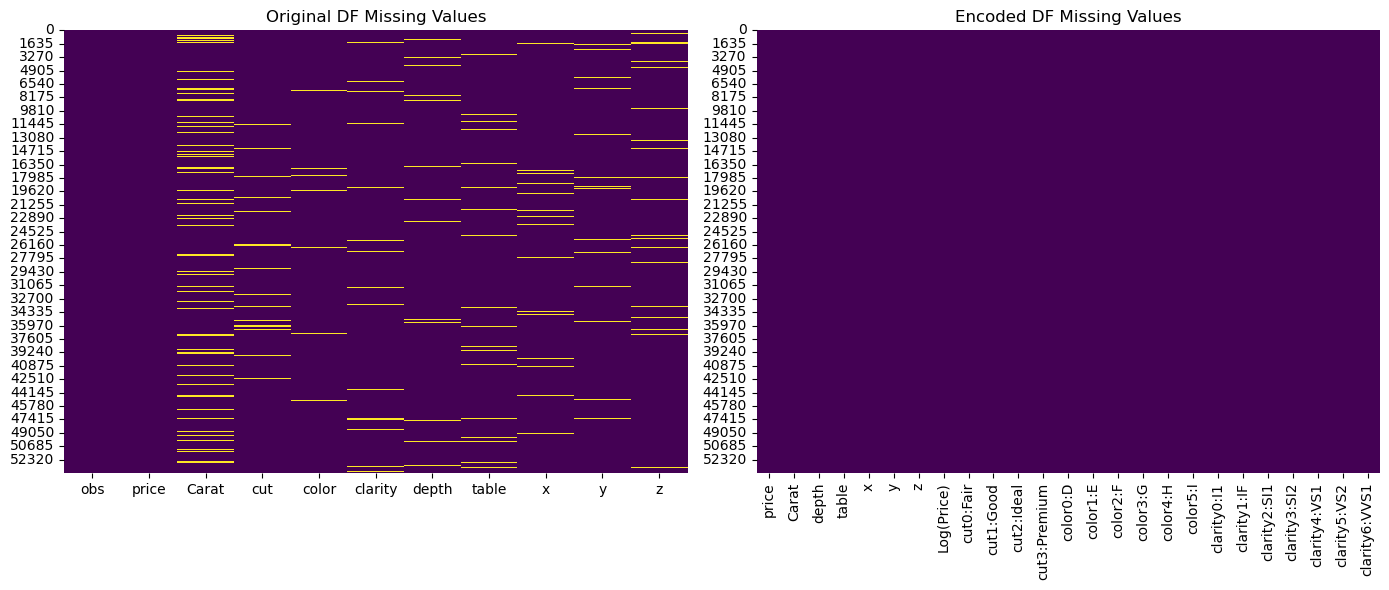

In [130]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for df showing missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", ax=axes[0])
axes[0].set_title('Original DF Missing Values')

# Heatmap for encoded_df showing missing values
sns.heatmap(encoded_df.isnull(), cbar=False, cmap="viridis", ax=axes[1])
axes[1].set_title('Encoded DF Missing Values')

# Display the plots
plt.tight_layout()
plt.show()


## Plot  Histogram of vales and distrobutions

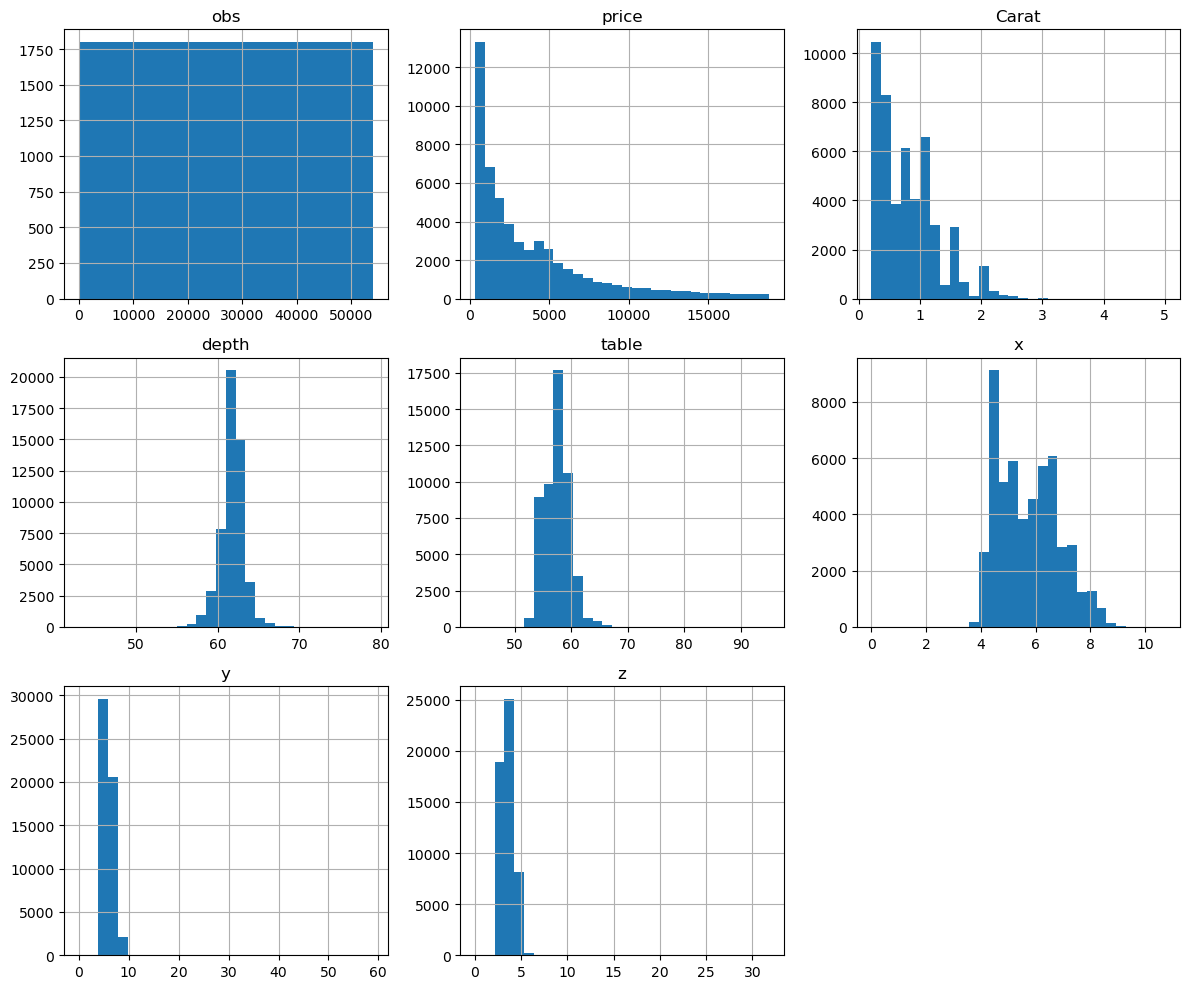

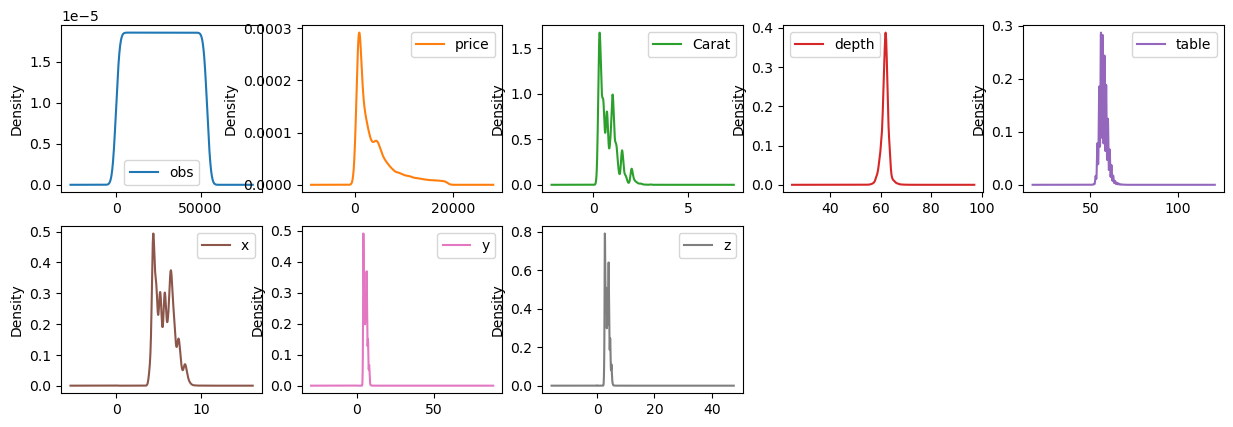

In [112]:
# Histogram for numeric columns
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Kernel Density Estimate (KDE) plot for visualizing distributions
df.plot(kind='density', subplots=True, layout=(4, 5), figsize=(15, 10), sharex=False)
plt.show()


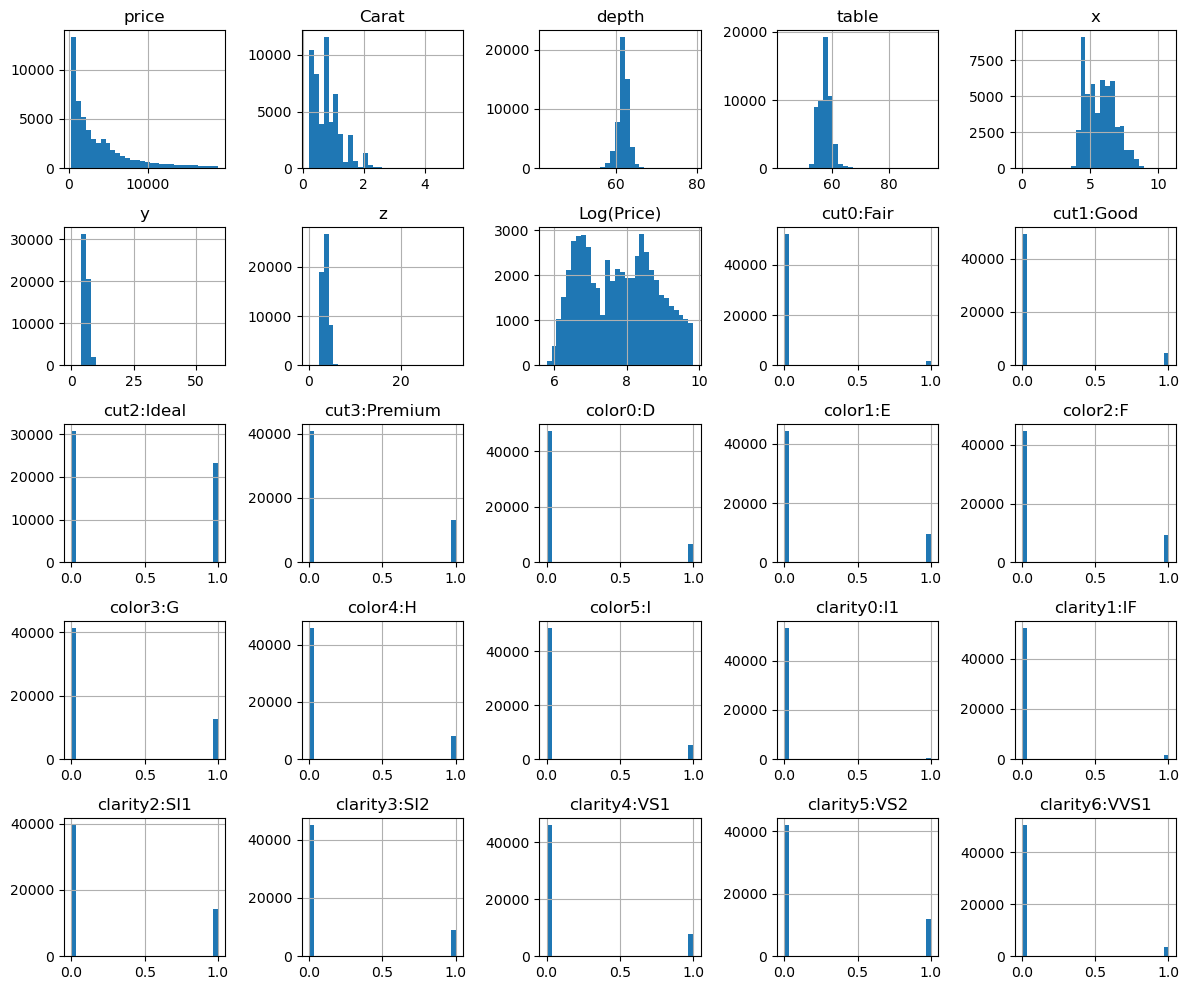

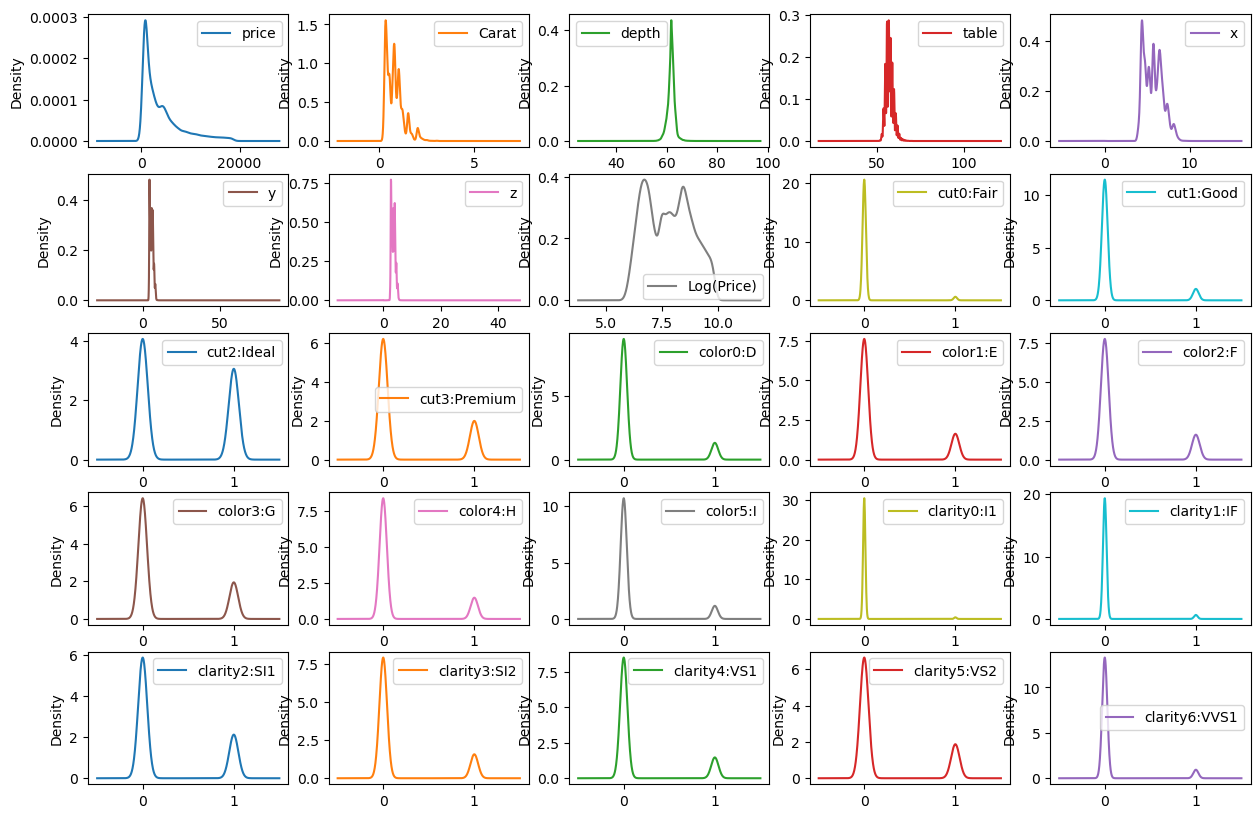

In [134]:
# Histogram for numeric columns
encoded_df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Kernel Density Estimate (KDE) plot for visualizing distributions
encoded_df.plot(kind='density', subplots=True, layout=(5, 5), figsize=(15, 10), sharex=False)
plt.show()

## Plot the Correaltion Matrix of the varibles

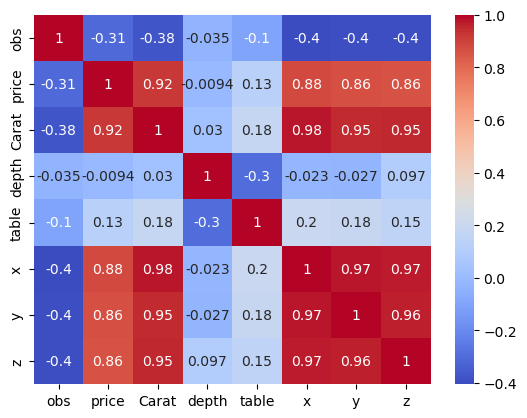

In [144]:
#import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Now, calculate the correlation matrix on the filtered numeric columns
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


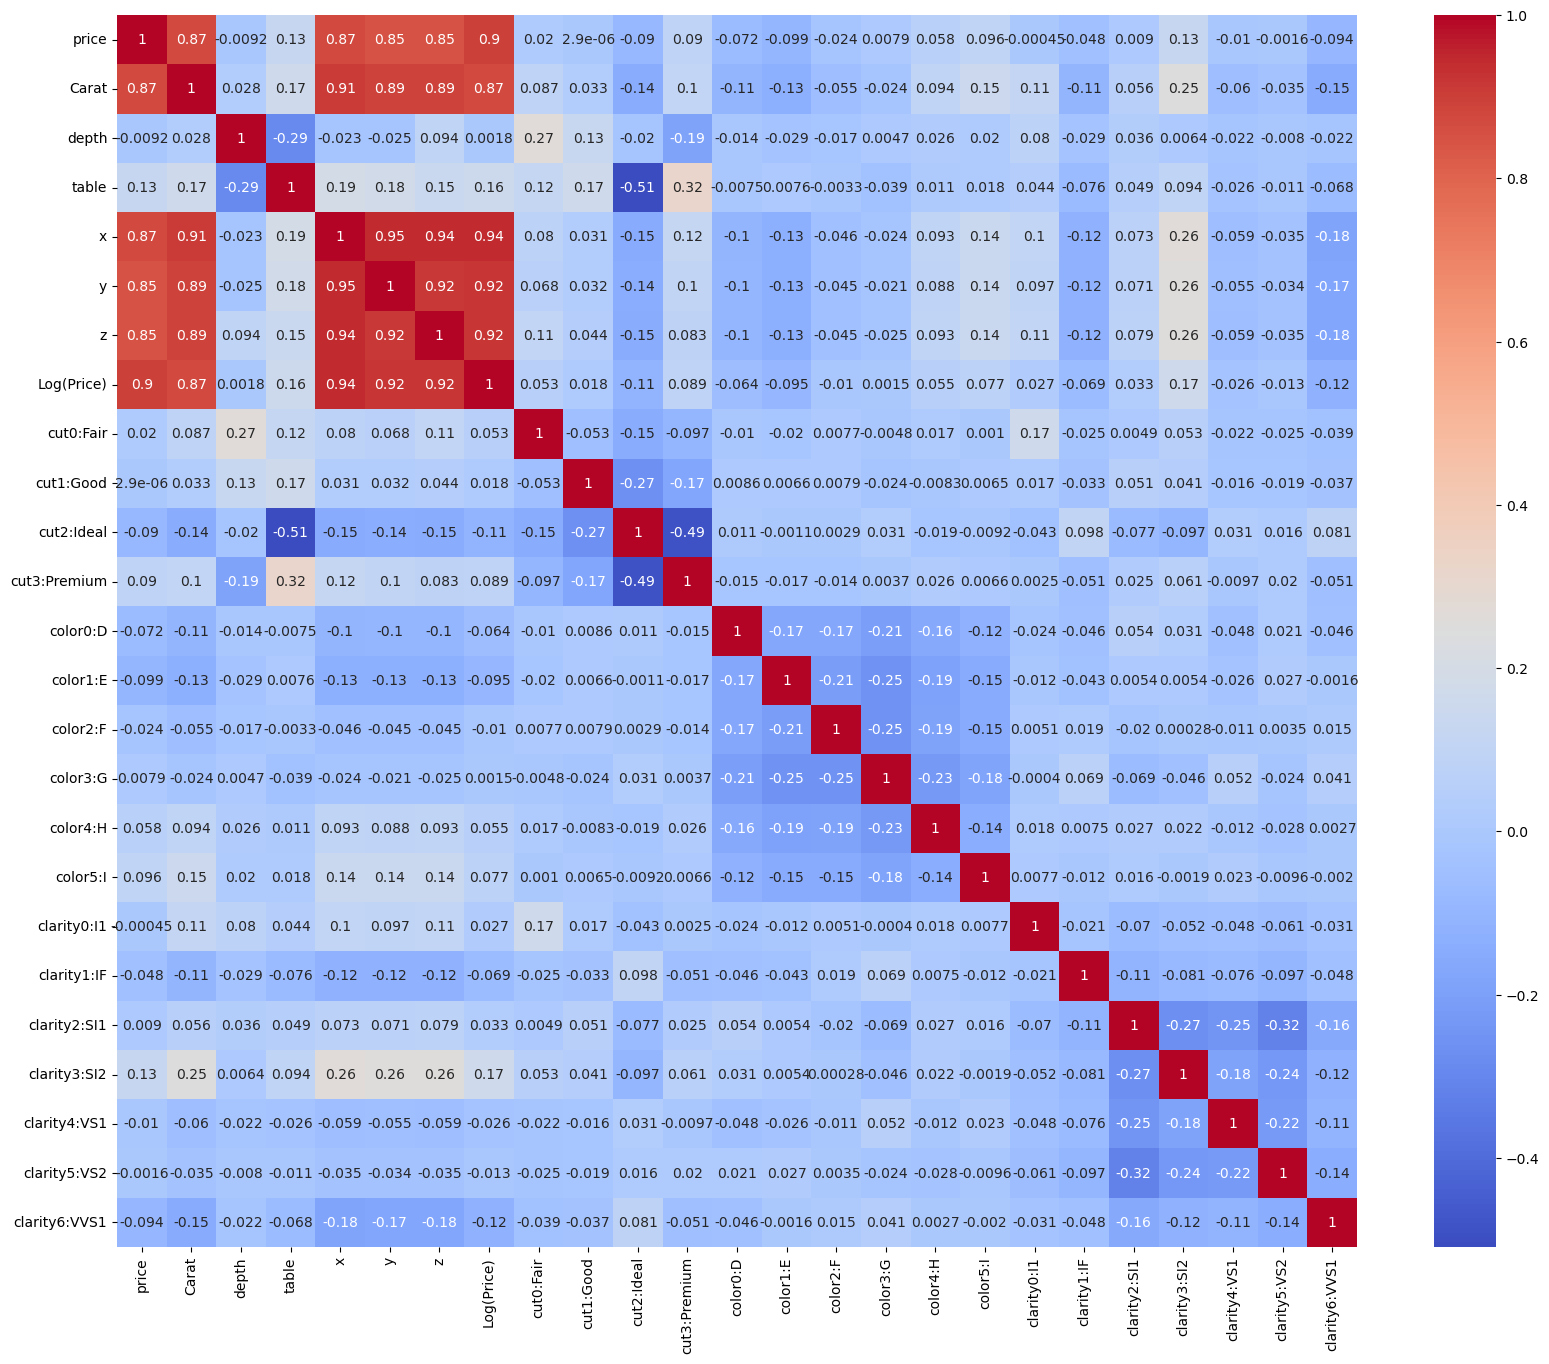

In [150]:

# Select only numeric columns from encoded DataFrame
encoded_numeric_df = encoded_df.select_dtypes(include=[float, int])

# Calculate the correlation matrix on the filtered numeric columns
correlation_matrix = encoded_numeric_df.corr()

# Set the figure size to make the chart larger
plt.figure(figsize=(20, 16))  # You can adjust the size as needed

# Visualize the correlation matrix with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()



## Plots the clusters of the numeric varibles

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


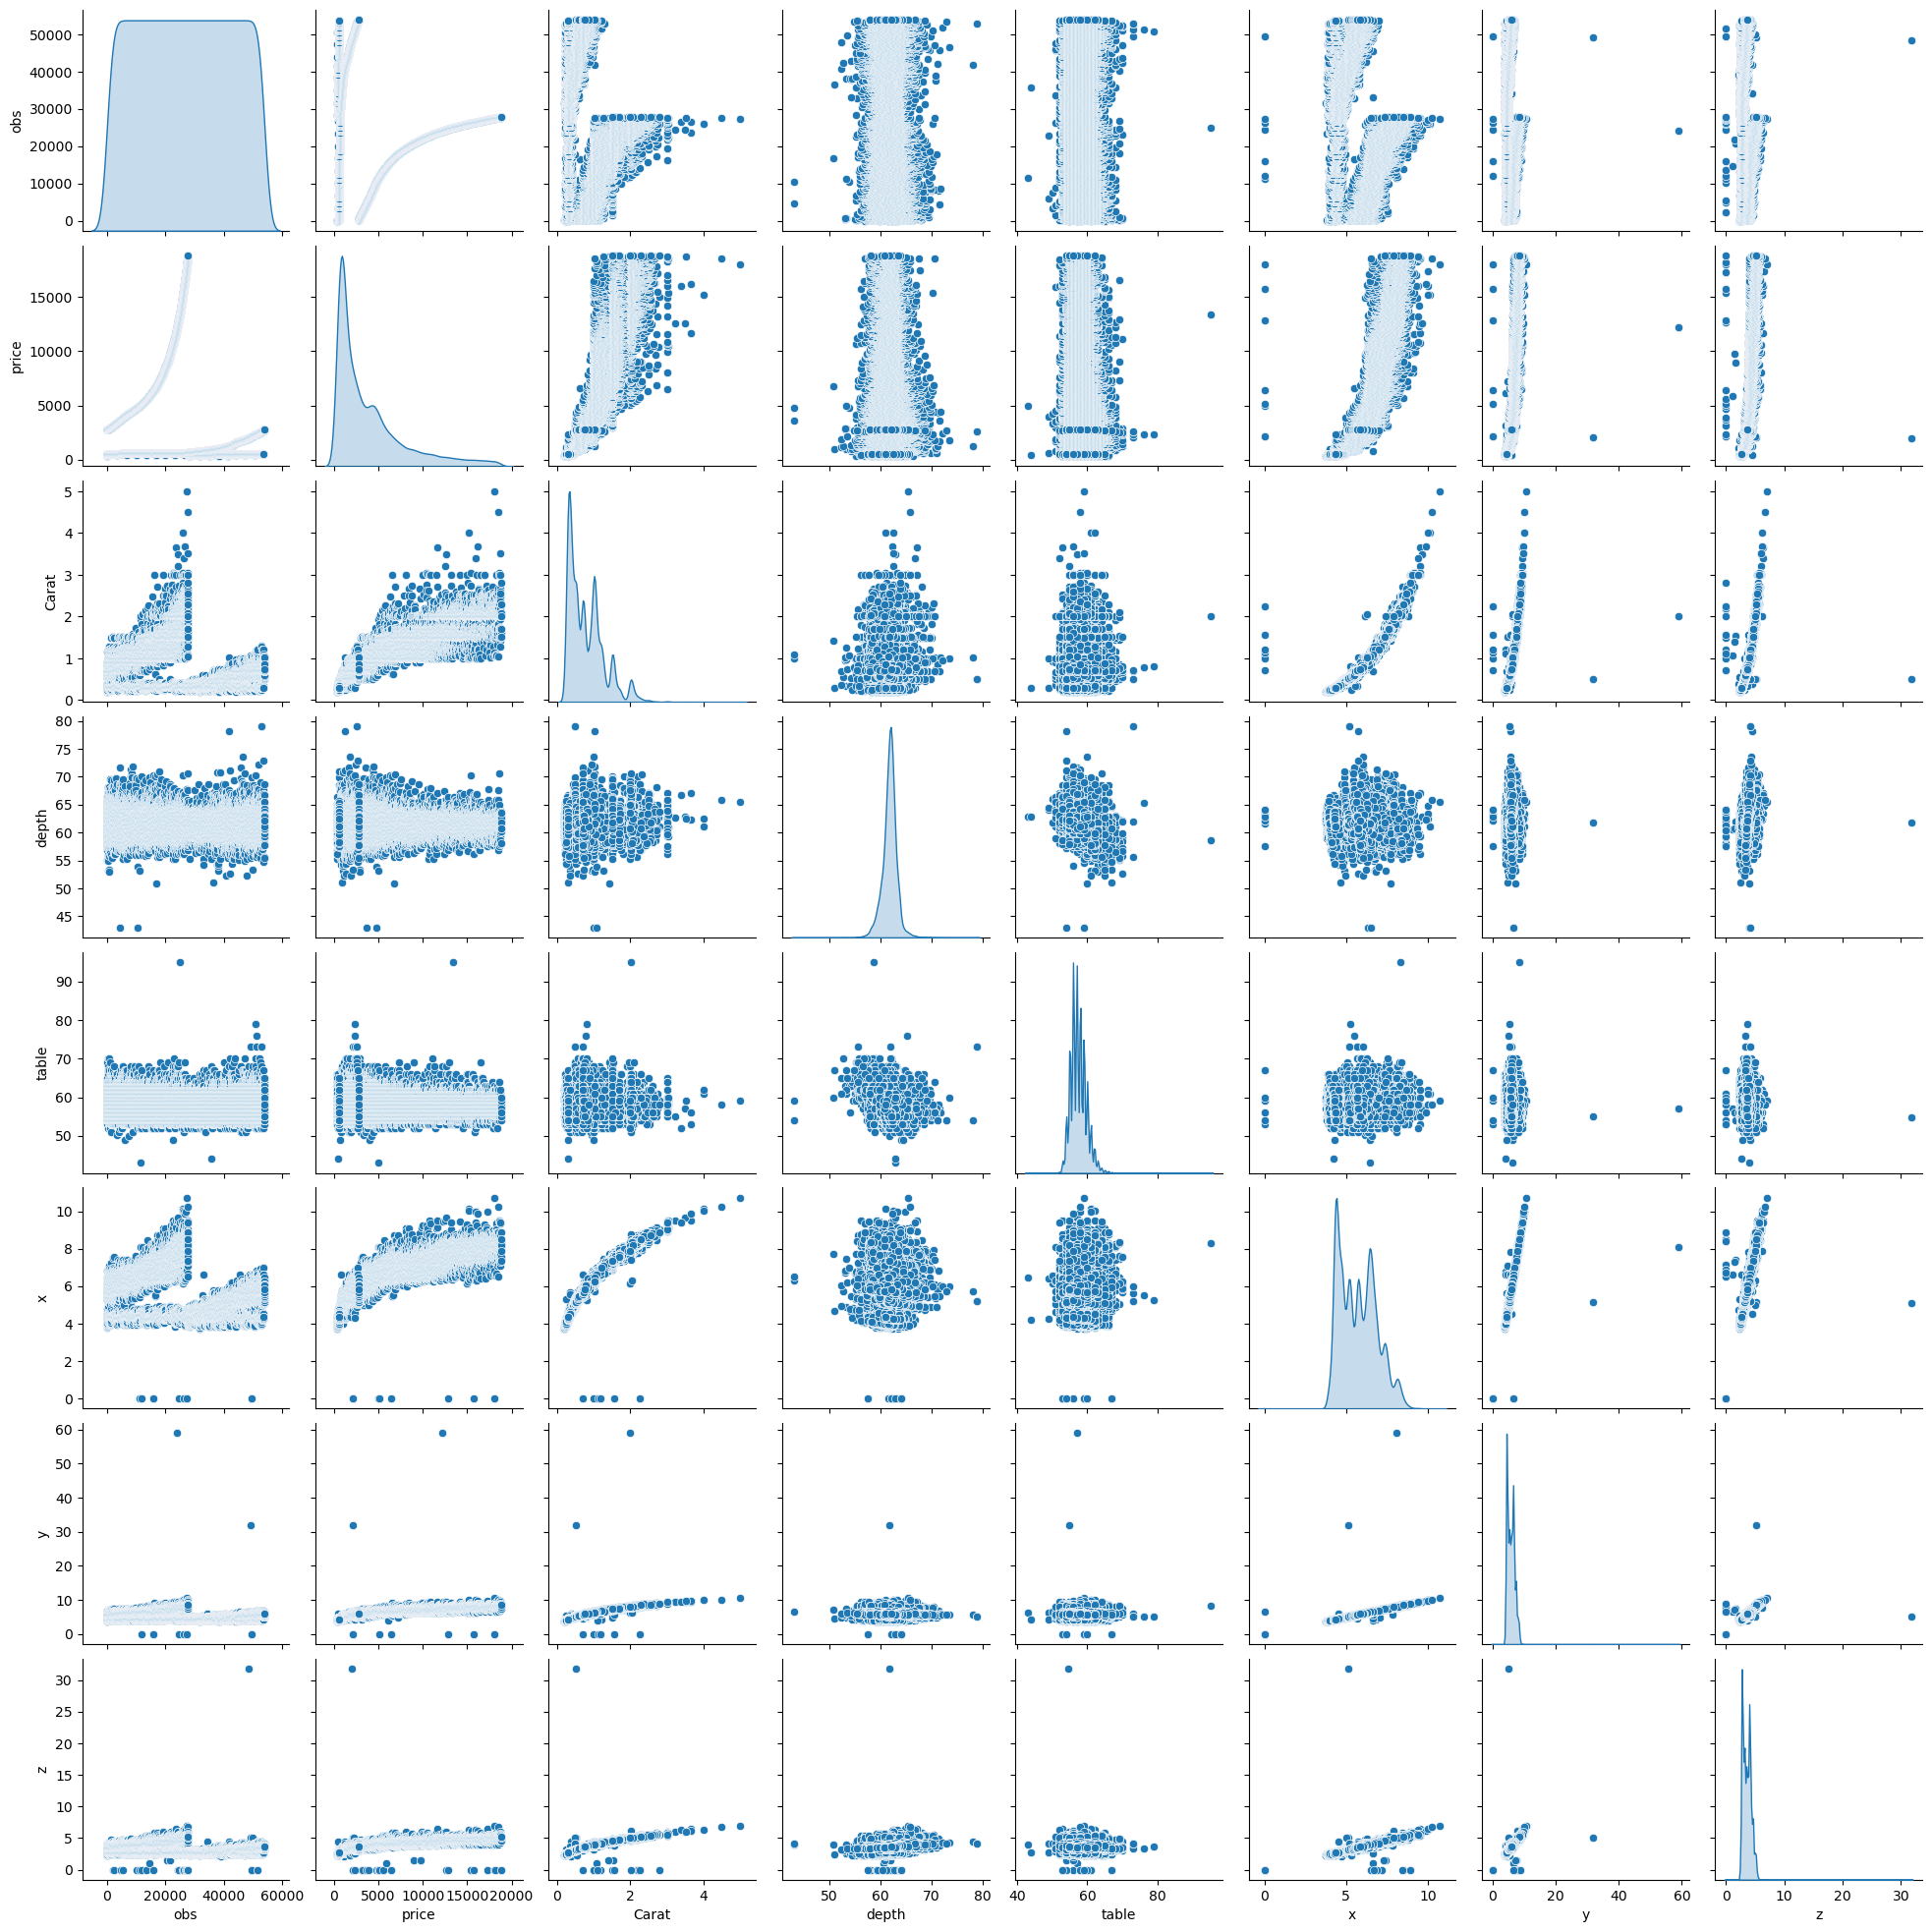

In [152]:
# Pairplot to visualize pairwise relationships between numerical variables
sns.pairplot(df, diag_kind='kde')
plt.show()


## the box plot to find outliers between numeric and categorical varibles

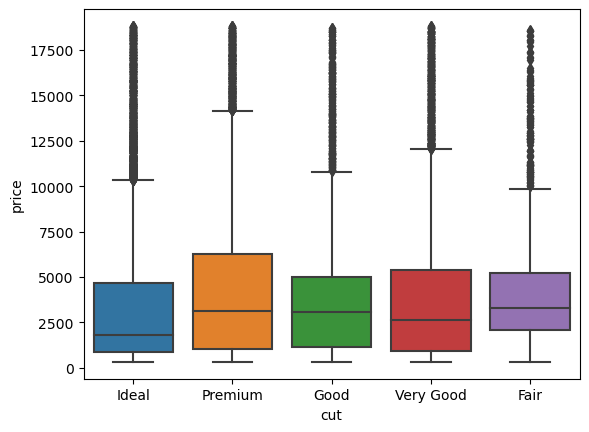

In [156]:

# Replace 'cut' with the actual categorical column and 'price' with the actual numerical column from your DataFrame
sns.boxplot(x='cut', y='price', data=df)

# Display the plot
plt.show()



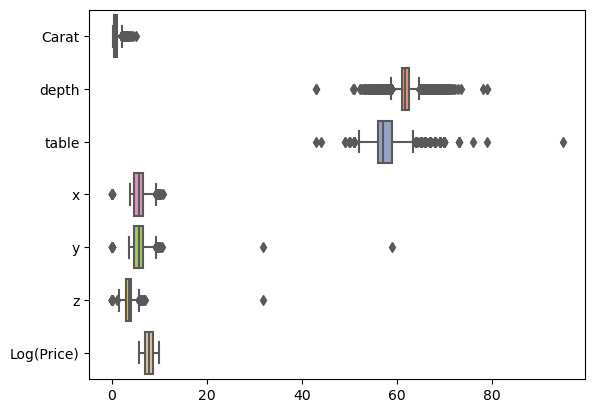

In [211]:
# Drop the 'obs' column from the DataFrame if it's present
df_no_obs = df.drop(columns=['obs', 'price'], errors='ignore')  # errors='ignore' ensures no error is raised if 'obs' doesn't exist

# Create the boxplot without the 'obs' column
sns.boxplot(data=df_no_obs, orient='h', palette='Set2')

# Show the plot
plt.show()


## Frequency Plots

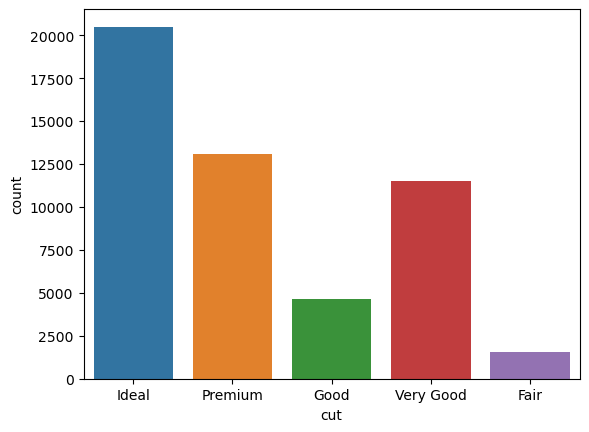

In [163]:
# Countplot to visualize the frequency distribution of categories
sns.countplot(x='cutimport plotly.express as px

# Interactive scatter plot
fig = px.scatter(df, x='price', y='Carat', color='cut')

# Update layout to make the plot taller and move the legend to the bottom right
fig.update_layout(
    height=800,  # Set height to make the plot vertically larger
    legend=dict(
        x=1,       # Position legend on the right (1 = far right)
        y=0,       # Position legend at the bottom (0 = bottom)
        xanchor='right',  # Anchor the legend to the right
        yanchor='bottom', # Anchor the legend to the bottom
        orientation='v',  # Ensure the legend is vertical
    )
)

# Show the plot
fig.show()
', data=df)
plt.show()


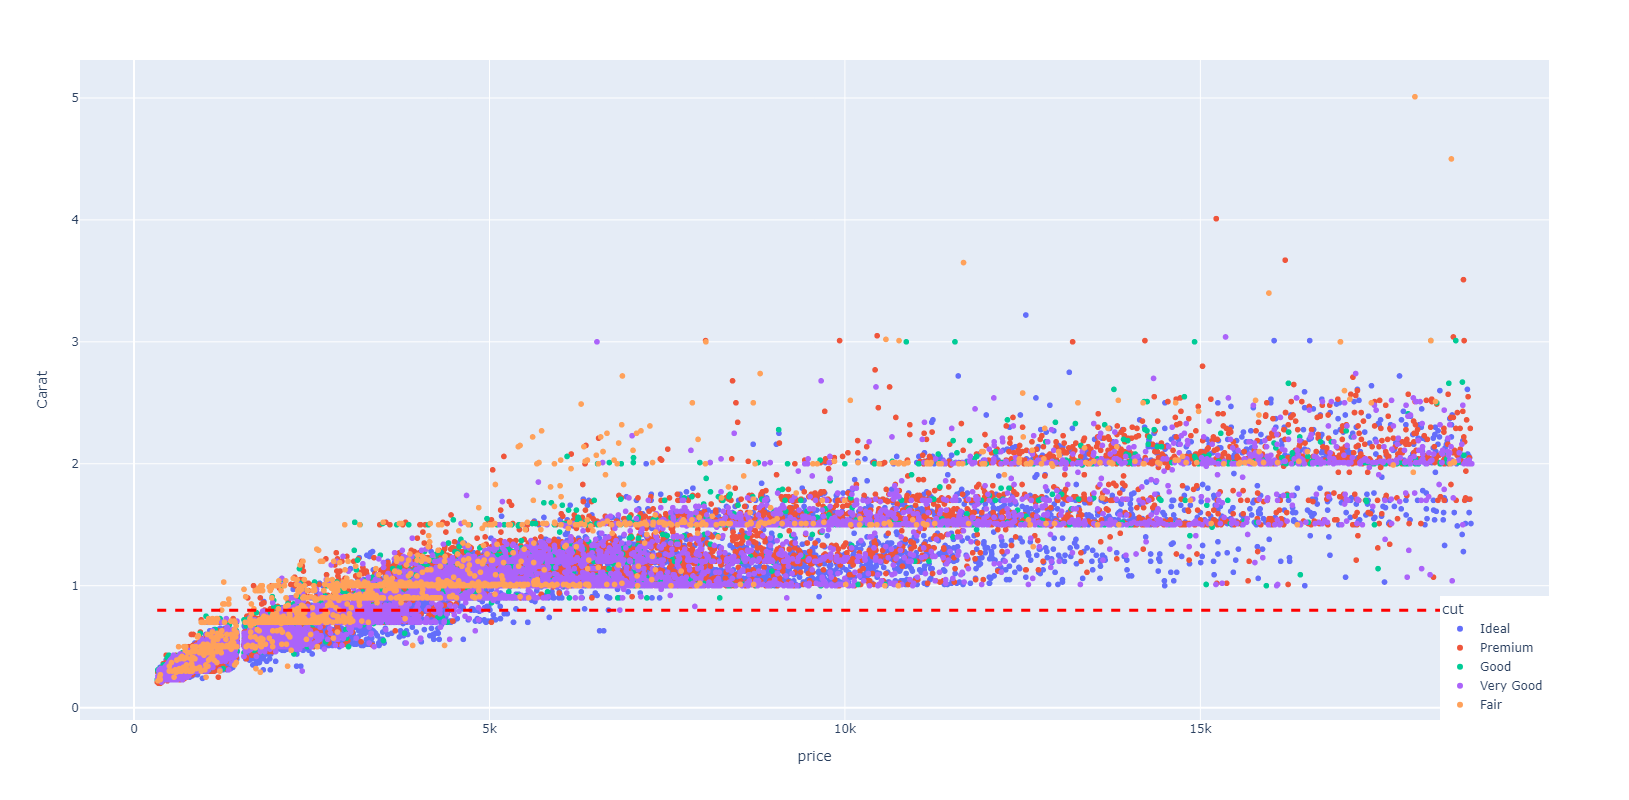

In [183]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(df, x='price', y='Carat', color='cut')

# Calculate the average of the 'Carat' column
carat_mean = df['Carat'].mean()

# Update layout to make the plot taller and move the legend to the bottom right
fig.update_layout(
    height=800,  # Set height to make the plot vertically larger
    legend=dict(
        x=1,        # Position legend on the right (1 = far right)
        y=0,        # Position legend at the bottom (0 = bottom)
        xanchor='right',
        yanchor='bottom',
        orientation='v',
    )
)

# Add a horizontal line for the average of 'Carat'
fig.add_shape(
    type="line",
    x0=df['price'].min(),  # Start line from the minimum 'price'
    y0=carat_mean,         # Y position is the average of 'Carat'
    x1=df['price'].max(),  # End line at the maximum 'price'
    y1=carat_mean,         # Keep the Y position the same (horizontal line)
    line=dict(color="Red", width=3, dash="dash")  # Customize the line appearance
)

# Show the plot
fig.show()




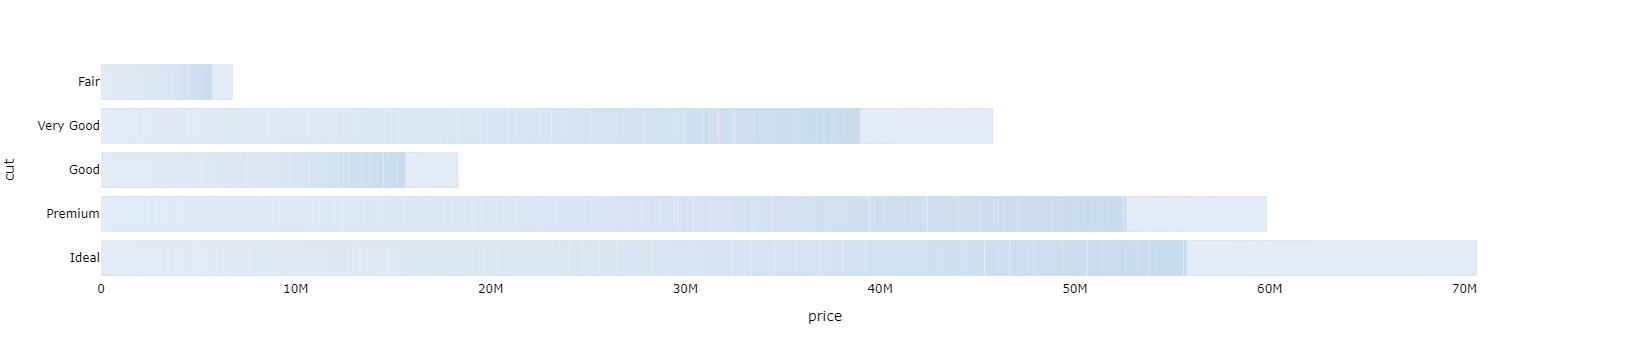

In [175]:
import plotly.express as px

# Define a custom vibrant color palette for better visibility
vibrant_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the bar plot with vibrant colors
fig = px.bar(df, x='price', y='cut', color_discrete_sequence=vibrant_colors)

# Update layout to set a darker background
fig.update_layout(
    plot_bgcolor='white',  # Setting the plot background to white for contrast
    paper_bgcolor='white',  # Setting the paper background to white
    font=dict(color='black')  # Make the font color black for visibility
)

# Show the plot
fig.show()


In [42]:
""" **********************************************************************  """
# Title: Performing stepwise regression with AdvancedAnalytics package, using 'price' as the target
""" STEPWISE REGRESSION USING AdvancedAnalytics with Target=price           """ 

# Drop the 'Log(Price)' column from the encoded DataFrame to ensure only necessary variables are used for regression
encoded_df_ = encoded_df.drop(['Log(Price)'], axis=1)

# Initialize the stepwise regression process:
# 'encoded_df_' is the data to be used, and 'target' specifies the dependent variable ('price')
# 'reg="linear"' specifies that this is a linear regression model
# 'method="stepwise"' applies stepwise selection (both forward and backward)
# 'crit_in=0.1' and 'crit_out=0.1' are significance criteria for including and excluding variables
# 'verbose=True' enables detailed output of the stepwise regression process
sw = stepwise(encoded_df_, target, reg="linear", method="stepwise", 
              crit_in=0.1, crit_out=0.1, verbose=True)

# Print a message indicating the stepwise process is starting with the specified target variable
print("\nRunning Stepwise with Target: ", target)

# Perform the stepwise regression, selecting the most significant variables
selected = sw.fit_transform()
""" **********************************************************************  """



Running Stepwise with Target:  price
Add  z                              with p-value 0.0
Add  clarity3:SI2                   with p-value 0.0
Add  clarity2:SI1                   with p-value 0.0
Add  x                              with p-value 0.0
Add  clarity0:I1                    with p-value 0.0
Add  Carat                          with p-value 0.0
Add  clarity5:VS2                   with p-value 1.95163e-204
Add  clarity4:VS1                   with p-value 1.00197e-172
Add  color5:I                       with p-value 8.7234e-150
Add  y                              with p-value 3.03765e-125
Add  color0:D                       with p-value 3.91248e-118
Add  color1:E                       with p-value 1.2577e-95
Add  color2:F                       with p-value 9.21227e-109
Add  color3:G                       with p-value 1.11193e-212
Remove color5:I                       with p-value 0.269957
Add  color4:H                       with p-value 4.17733e-134
Add  color5:I                

' **********************************************************************  '

In [29]:
# Compute the log-likelihood of the model using the estimated parameters
ll = model.loglike(results.params)

# Calculate the degrees of freedom for the model, adding 2 to account for the intercept and sigma
model_df = model.df_model + 2  # plus intercept and sigma

# Get the number of observations (nobs) from the dependent variable 'y'
nobs = y.shape[0]

# Calculate Akaike Information Criterion (AIC) using the log-likelihood, number of observations, and model degrees of freedom
aic = em.aic(ll,  nobs, model_df)

# Calculate Bayesian Information Criterion (BIC) using the log-likelihood, number of observations, and model degrees of freedom
bic = em.bic(ll,  nobs, model_df)

# Calculate corrected Akaike Information Criterion (AICC) to account for finite sample sizes
aicc = em.aicc(ll, nobs, model_df)

# Print the results for AICC, AIC, and BIC, comparing them to reference values from SAS
print("\n")
print("AICC: ", aicc, "AIC: ", aic, "BIC: ", bic)




AICC:  943541.0119758176 AIC:  943540.9878633422 BIC:  943763.3785532595


In [31]:
# Print a line of asterisks for visual separation of results in the output
print("\n*******************************************************")

# Print a title indicating that the target variable in the regression model is 'Price'
print("                                   Target: Price        ")

# Print a detailed summary of the regression model results, including coefficients, p-values, and diagnostics
print(results.summary())

# Print another line of asterisks to visually conclude the results section
print("\n*******************************************************")



*******************************************************
                                   Target: Price        
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.379e+04
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:40:51   Log-Likelihood:            -4.7175e+05
No. Observations:               53940   AIC:                         9.435e+05
Df Residuals:                   53916   BIC:                         9.438e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [44]:
# Get the predicted values (fitted values) from the regression model
predicted = results.fittedvalues

# Get the residuals (difference between observed and predicted values) from the regression model
residual = results.resid

# Get influence statistics (e.g., leverage, Cook's distance) for diagnosing influential data points
influence = results.get_influence()

# Get the number of observations (nobs) from the dependent variable 'y'
nobs = y.shape[0]

# Calculate the expected number of observations outside +/- 3 standard deviations (3Sigma)
n3 = 2.0 * (1.0 - norm.cdf(3.0)) * nobs

# Calculate the expected number of observations outside +/- 4 standard deviations (4Sigma)
n4 = 2.0 * (1.0 - norm.cdf(4.0)) * nobs

# Calculate the expected number of observations outside +/- 6 standard deviations (6Sigma)
n6 = 2.0 * (1.0 - norm.cdf(6.0)) * nobs

# Print a message indicating that the following output refers to expected observation counts beyond certain limits
print("\nExpected number of observations outside stated limits:")

# Print the expected number of observations outside +/- 3 standard deviations
print("+/- 3Sigma: ", int(round(n3)))

# Print the expected number of observations outside +/- 4 standard deviations
print("+/- 4Sigma: ", int(round(n4)))

# Print the expected number of observations outside +/- 6 standard deviations
print("+/- 6Sigma: ", int(round(n6)))




Expected number of observations outside stated limits:
+/- 3Sigma:  146
+/- 4Sigma:  3
+/- 6Sigma:  0


In [46]:
# Print a new line for formatting purposes
print("\n")

# Extract the leverage values (diagonal of the hat matrix) from the influence statistics
leverage = influence.hat_matrix_diag

# Extract Cook's distance values from the influence statistics (used to detect influential data points)
cooks_d = influence.cooks_distance[0]

# Calculate the cutoff value for Cook's distance based on the formula 4/n (where n is the number of observations)
cutoffD = 4.0 / nobs

# Print the maximum Cook's distance and the cutoff value for flagging influential points
print("Max Cooks D: {:8.4f}  Cutoff ( 4/n): {:8.5f}".format(cooks_d.max(), cutoffD))

# Calculate the cutoff value for leverage based on the formula 2p/n (where p is the model degrees of freedom)
cutoffH = 2.0 * model_df / nobs

# Print the maximum leverage value and the cutoff for identifying high-leverage points
print("Max H:       {:8.4f}  Cutoff (2p/n): {:8.5f}".format(leverage.max(), cutoffH))




Max Cooks D:  10.3985  Cutoff ( 4/n):  0.00007
Max H:         0.4044  Cutoff (2p/n):  0.00093


In [50]:
# Calculate standardized residuals by dividing the residuals by the square root of the mean squared error of residuals
std_residuals = residual / np.sqrt(results.mse_resid)

# Get the studentized residuals (internally adjusted residuals that account for leverage and variance)
stud_residuals = influence.resid_studentized_internal

# Identify the indices of studentized residuals greater than 6 (extreme positive outliers)
outliers = np.nonzero(stud_residuals > 6)[0]

# Append indices of studentized residuals less than -6 (extreme negative outliers)
outliers = np.append(outliers, np.nonzero(stud_residuals < -6)[0])

# Print the total number of residuals that exceed +/- 6 standard deviations
print("\nNumber of Residuals beyond +/-6 sigma for Log(price):", 
      outliers.shape[0])

# Print a header indicating the list of residuals that are beyond the +/- 6 sigma limit
print("Residuals beyond +/-6 sigma:")

# Print a separator line to visually structure the output
print("*******************************************************")

# Print column headers for the output table listing the case number, observed values, predicted values, and studentized residuals
print(" Case      Observed      Predicted       Stud. Resid.")

# Identify and print the indices of studentized residuals greater than 6
outliers = np.nonzero(stud_residuals > 6)[0]
for case in outliers:
    # Print each case's index, observed value, predicted value, and studentized residuals for positive outliers
    print("{:5d}{:13.2f}{:14.2f}{:17.2f}". 
          format(case, y[case], predicted[case], stud_residuals[case]))

# Identify and print the indices of studentized residuals less than -6
outliers = np.nonzero(stud_residuals < -6)[0]
for case in outliers:
    # Print each case's index, observed value, predicted value, and studentized residuals for negative outliers
    print("{:5d}{:13.2f}{:14.2f}{:17.2f}". 
          format(case, y[case], predicted[case], stud_residuals[case]))

# Print an empty line for better readability
print("")

# Print a separator line for visual separation of the summary section
print("\n*******************************************************")

# Print headers for the summary statistics for observed, predicted, and residual values
print("                             Min      Mean        Max")

# Print the minimum, mean, and maximum values of the observed variable 'y'
print("Observed:              {:10.4f} {:10.4f} {:10.4f}".
      format(y.min(),  y.mean(), y.max()))

# Print the minimum, mean, and maximum values of the predicted variable
print("Predicted:             {:10.4f} {:10.4f} {:10.4f}".
      format(predicted.min(),  predicted.mean(), predicted.max()))

# Print the minimum, mean, and maximum values of the residuals
print("Residuals:            {:10.4f} {:10.4f} {:10.4f}".
      format(residual.min(),  residual.mean(), residual.max()))

# Print the minimum, mean, and maximum values of the standardized residuals
print("Standardized Residuals:{:10.4f} {:10.4f} {:10.4f}".
      format(std_residuals.min(), std_residuals.mean(), std_residuals.max()))

# Print the minimum, mean, and




Number of Residuals beyond +/-6 sigma for Log(price): 77
Residuals beyond +/-6 sigma:
*******************************************************
 Case      Observed      Predicted       Stud. Resid.
11182      4954.00      -4916.20             6.52
11963      5139.00      -7269.01             8.18
15951      6381.00      -7184.63             8.95
24520     12800.00      -4599.90            11.47
26119     15394.00       4759.48             7.00
26243     15686.00      -5214.63            13.78
26646     16427.00       7263.01             6.03
26842     16768.00       7470.49             6.12
26955     17024.00       6829.87             6.71
26960     17029.00       7422.67             6.32
26987     17073.00       7736.23             6.14
26998     17100.00       7463.55             6.34
27010     17127.00       7639.40             6.24
27019     17153.00       7861.22             6.11
27024     17164.00       7824.85             6.15
27064     17182.00       7940.33             6.08
270

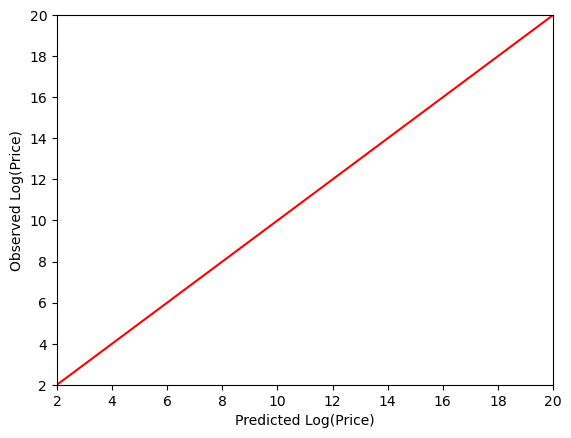

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


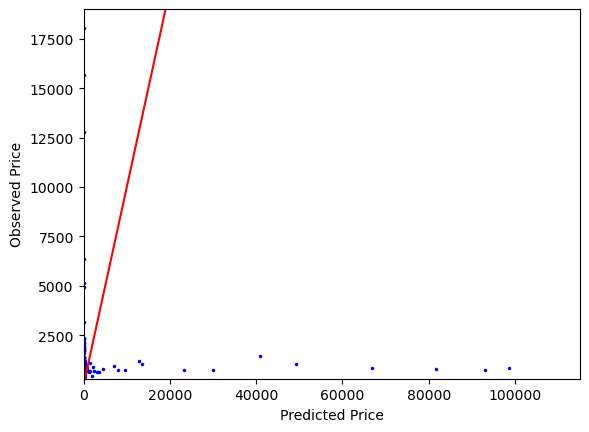

In [56]:
# Using MatPlot for residual and influence graphics
# Plot of Observed Values versus the Predicted Values
plt.figure()
plt.xlabel("Predicted Log(Price)")
plt.ylabel("Observed Log(Price)")
plt.plot(predicted, y, "bo", markersize=1.5)
plt.plot( [2,20], [2,20], "r", linewidth=1.5)
plt.axis([2, 20, 2, 20])
plt.show()

pred = np.exp(predicted)
plt.figure()
plt.xlabel("Predicted Price")
plt.ylabel("Observed Price")
plt.plot(pred, encoded_df['price'], "bo", markersize=1.5)
plt.plot( [300,20000], [300, 20000], "r", linewidth=1.5)
plt.axis([ 0, 115000, 300, 19000])
plt.show()


/tmp/ipykernel_149/3069202895.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(311)


<Figure size 640x480 with 0 Axes>

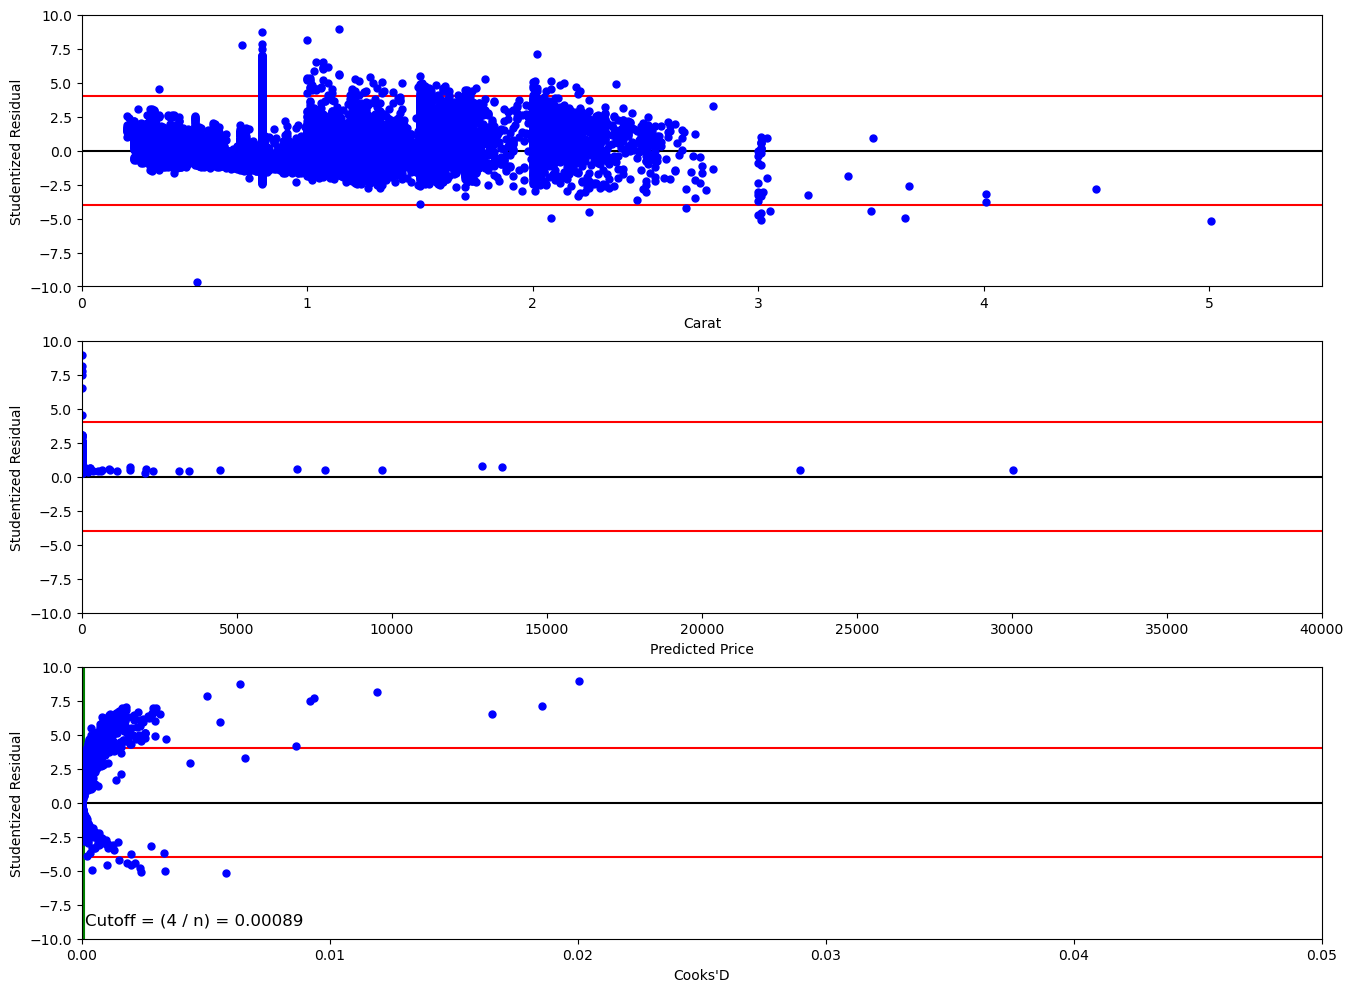

In [54]:
# Multiplot of 1.  Carat vs Studentized Residuals, 
#              2.  Predicted Value vs. Studentized Residuals, and
#              3.  Cook's D vs. Studentized Residuals
plt.figure()
plt.subplots(figsize=(16,12))
plt.subplot(311)
plt.xlabel("Carat")
plt.ylabel("Studentized Residual")
plt.axis([0,5.5, -10.0, +10.0])
plt.axhline(0, color="k")
plt.axhline(4, color="r")
plt.axhline(-4, color="r")
plt.plot(encoded_df['Carat'], stud_residuals, "bo", markersize=5)

plt.subplot(312)
plt.xlabel("Predicted Price")
plt.ylabel("Studentized Residual")
plt.axis([0, 40000, -10.0, +10.0])
#plt.axis([4, 14, -10.0, +10.0])
plt.axhline(0, color="k")
plt.axhline(4, color="r")
plt.axhline(-4, color="r")
plt.plot(pred, stud_residuals, 'bo', markersize=5)

plt.subplot(313)
plt.xlabel("Cooks'D")
plt.ylabel("Studentized Residual")
plt.axis([0,0.05, -10.0, +10.0])
plt.axhline(0, color="k")
plt.axhline(4, color="r")
plt.axhline(-4, color="r")
plt.axvline(cutoffD, color="g")
plt.plot(cooks_d, stud_residuals, 'bo', markersize=5)
plt.text(cutoffD+0.00005, -9, "Cutoff = (4 / n) = 0.00089", fontsize=12)
plt.show()

In [58]:
X_train, X_validate, y_train, y_validate =  \
    train_test_split(Xc, y, test_size=0.3, random_state = 12345)

model    = sm.OLS(y_train, X_train)  # Using StatsModels for Linear Regression
results  = model.fit()
print("\n*******************************************************")
print("                              Target: Log(Price)       ")
print(results.summary())
print("\n*******************************************************\n")

print("AdvancedAnalytics Display Split Metrics:")
linreg.display_split_metrics(results, X_train,y_train, X_validate,y_validate)


*******************************************************
                              Target: Log(Price)       
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     9772.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:07:30   Log-Likelihood:            -3.3028e+05
No. Observations:               37758   AIC:                         6.606e+05
Df Residuals:                   37734   BIC:                         6.608e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------